CUSTOMER CHURN PREDICTION MACHINE LEARNING PROJECT

INTRODUCTION
In the dynamic landscape of telecommunications, customer churn has emerged as a critical challenge that demands strategic attention and innovative solutions. The Telco Customer Churn Mitigation Project is an ambitious initiative aimed at understanding, analyzing, and ultimately reducing customer attrition within our telecommunications services

PROJECT OBJECTIVES
This project aims at building a machine learning that will predict the likelyhood of a customer churning. we will talk a look at 3 different datasets from vodafone telecommunication company.

NULL HYPOTHESIS
There is no significant relationship between the customer churn and the dependents of a customer

ALTERNATE HYPOTHESIS
There is a significant relationship between the customer churn and the dependents of a customer

ANALYTICAL QUESTIONS



IMPORT ALL THE NECESSARY LIBRARIES NEEDED 

In [1]:
#Import libraries needed for data manipulation, cleaning and visualizations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import all the necessary libraries need to laod data from microsoft SQL server

import pyodbc    
from dotenv import dotenv_values
import warnings 

warnings.filterwarnings('ignore')

LOAD DATASETS
For this project, we will load three datasets from various sources.
1. My SQL server
2. Azubi Onedrive
3. Azubi github repository

In [4]:
#load environment viarables from .env
environment_variables= dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=y"

In [5]:
connection = pyodbc.connect(connection_string)

LOAD FIRST 3000 DATASETS

In [6]:
query= 'Select * from dbo.LP2_Telco_churn_first_3000'

data1= pd.read_sql(query,connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


CONVERT LOADED DATA TO A CSV FILE

In [7]:
search_directory = r'C:\Users\USER\Desktop\projectone\Customer-Churn-ML-Project'
file_name = 'Telco-churn-first-3000'
file_path = f'{search_directory}\\{file_name}'

data1.to_csv(file_path, index=False)

LOAD SECOND DATASET

In [8]:
data2=pd.read_csv('Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


LOAD THIRD DATASET

In [9]:
data3=pd.read_csv('LP2_Telco-churn-last-2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


DATA PREVIEW

Preview dataset using info, isnull and duplicated methods to have a basic understanding of all the datasets

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

OBSERVATIONS
1. Some columns has null values in them
2. Total charges column is in an object format

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [13]:
# check for null values
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

OBSERVATIONS
1. Total charges columns is in an object format 


In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [15]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

OBSERVATIONS
Total charges column is in a string format

ITERATE THROUGH COLUMNS IN THE FIRST DATA TO IDENTIFY ANOMALIES

In [16]:
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


OBSEVATIONS
It can be observed that, most of the columns are booleans and needs to be stardardise into string formats

STANDARDISE ALL BOOLEAN COLUMNS IN DATA1 TO YES AND NO STRING VALUES

In [17]:
# convert boolean values in the senior citizen column to strings
data1['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

# convert boolean values in the partner column to strings
data1['Partner']= data1['Partner'].replace({False:'No', True:'Yes'})

# convert boolean values in the dependants column to strings
data1['Dependents']= data1['Dependents'].replace({False:'No', True:'Yes'})

# convert boolean values in the phone service column to strings
data1['PhoneService']= data1['PhoneService'].replace({False:'No', True:'Yes'})

# convert boolean values in the MultipleLines column to strings
data1['MultipleLines']= data1['MultipleLines'].replace({False:'No', True:'Yes', None:'No phone service'})

# convert boolean values in the OnlineSecurity column to strings
data1['OnlineSecurity']= data1['OnlineSecurity'].replace({False:'No', True:'Yes', None:'No internet service'})


# convert boolean values in the OnlineBackup column to strings
data1['OnlineBackup']= data1['OnlineBackup'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the DeviceProtection column to strings
data1['DeviceProtection']= data1['DeviceProtection'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the TechSupport column to strings
data1['TechSupport']= data1['TechSupport'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingTV column to strings
data1['StreamingTV']= data1['StreamingTV'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the StreamingMovies column to strings
data1['StreamingMovies']= data1['StreamingMovies'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the PaperlessBilling column to strings
data1['PaperlessBilling']= data1['PaperlessBilling'].replace({False:'No', True:'Yes', None:'No internet service'})

# convert boolean values in the Churn column to strings
data1['Churn']= data1['Churn'].replace({False:'No', True:'Yes'})



STANDARDISE THE SENIOR CITIZEN COLUMNS OF DATA2 AND DATA3 TO STRING VALUES

In [18]:
# Replace int values in the senior citizen column of data2 to string values
data2['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

# Replace int values in the senior citizen column of data3 to string values
data3['SeniorCitizen']= data1['SeniorCitizen'].replace({False:'No', True:'Yes'})

RENAME SOME COLUMNS INTO A STANDARDISED FORMAT 

In [19]:
#Rename the customerID, gender and tenure columns in data1
data1= data1.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

#Rename the customerID, gender and tenure columns in data1
data2= data2.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

#Rename the customerID, gender and tenure columns in data1
data3= data3.rename(columns={'customerID':'CustomerID', 'gender':'Gender','tenure':'Tenure' })

DROP NULL VALUES IN THE CHURN COLUMN OF DATA1

In [20]:
# Drop rows with NaN values in the 'Churn' column
data1.dropna(subset=['Churn'], inplace=True)


CONFIRM THE ABOVE CODE

In [69]:
data1['Churn'].isnull().sum()

0

MERGED DATA1 AND DATA3 FOR FURTHER ANALYSIS

In [22]:
# merged data1 and data3 for further analysis and training
merged_data= pd.concat([data1, data3])
merged_data

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,No,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


CONVERT MERGED DATA TO A CSV FILE 

In [23]:
search_directory = r'C:\Users\USER\Desktop\projectone\Customer-Churn-ML-Project'
file_name = 'Cleaned_data'
file_path = f'{search_directory}\\{file_name}'

merged_data.to_csv(file_path, index=False)

In [70]:
Cleaned_data= pd.read_csv('Cleaned_data')
Cleaned_data

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5038,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5039,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5040,8361-LTMKD,Male,No,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


DATA UNDERSTANDING OF CLEANED DATA

UNIVARIATE ANALYSIS

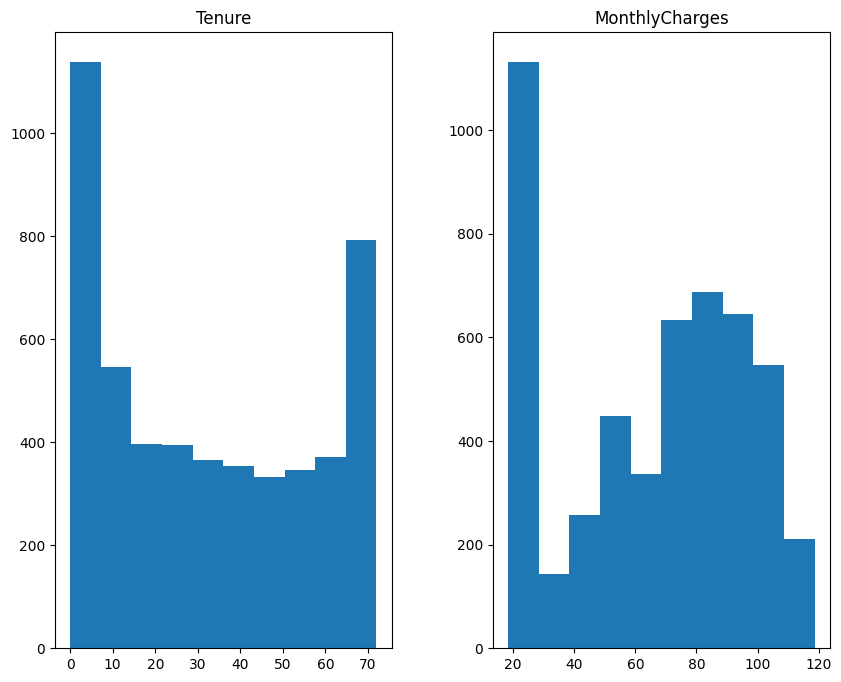

In [26]:
Cleaned_data.hist(figsize=(10, 8), grid=False)
plt.show()

BIVARIATE ANALYSIS

<Axes: >

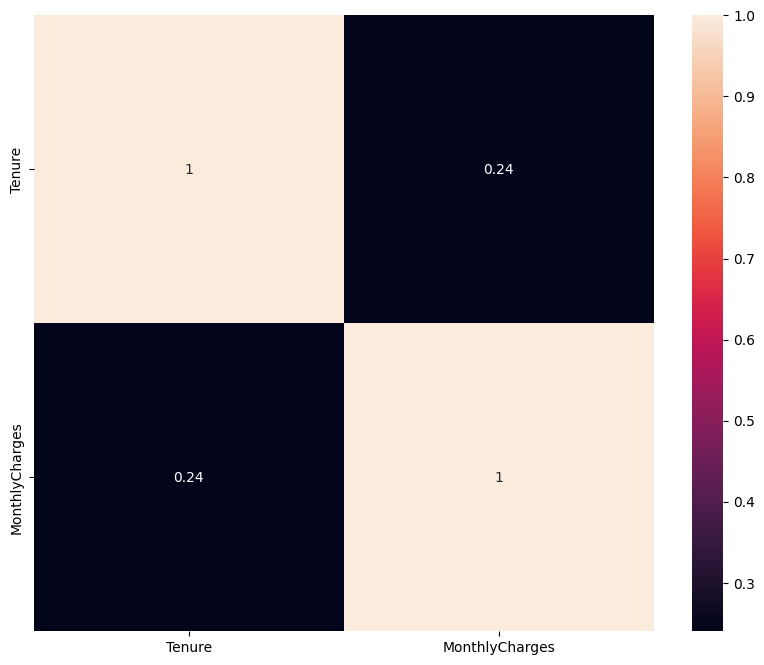

In [27]:
correlation= Cleaned_data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation, annot=True)

 MULTIVIRIATE ANALYSIS 

PREVIEW CLEANED DATA

In [28]:
#Check basic information of the data using the info method
Cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5042 non-null   object 
 1   Gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   Tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   object 
 10  OnlineBackup      5042 non-null   object 
 11  DeviceProtection  5042 non-null   object 
 12  TechSupport       5042 non-null   object 
 13  StreamingTV       5042 non-null   object 
 14  StreamingMovies   5042 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 


ANSWER ANALYTICAL 
1.What payment method has the highest churn ?
2.What is the churn rate among senior citizens?
3.Are customers with Fiber optic internet more likely to churn compared to DSL users?
4.Which gender churned more?
5.How does the contract duration affect the likelyhood of a customer churning?

  Q1. What payment method has the highest churn ?

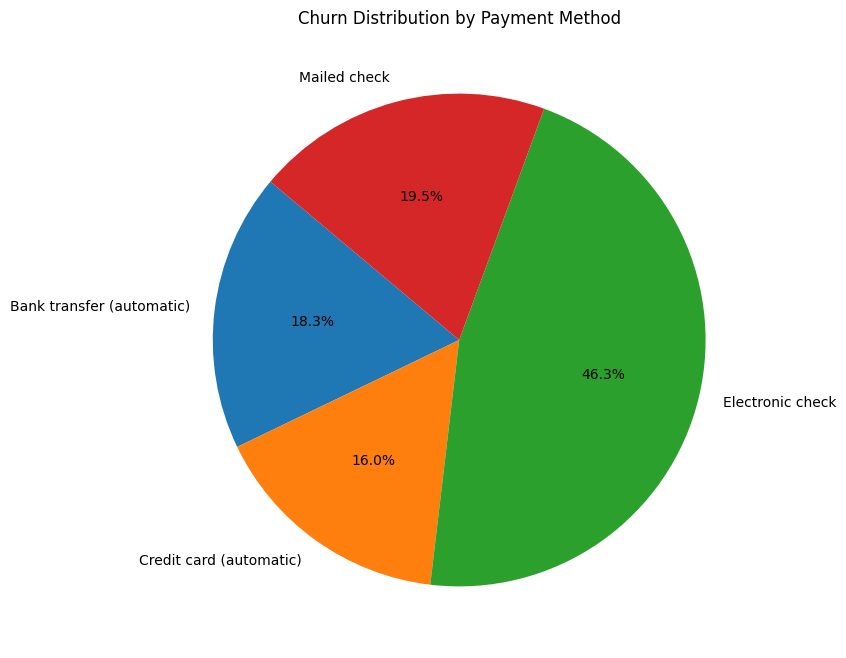

The payment method with the highest churn is: Electronic check


In [72]:
# Group by PaymentMethod and calculate the churn rates(normalize=True).unstack() for each method
payment_churn = Cleaned_data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_churn['Yes'], labels=payment_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Payment Method')
plt.show()

# Identify the payment method with the highest churn
highest_churn_method = payment_churn['Yes'].idxmax()

# Print the payment method with the highest churn
print(f"The payment method with the highest churn is: {highest_churn_method}")

INSIGHTS AND RECOMMENDATIONS
1. The payment method "Electronic check" has the highest rate of customer turnover (754), indicating that, in comparison to other payment methods, customers who use electronic checks are more likely to experience churn.
2. Customers who use "Credit card (automatic)" and "Bank transfer (automatic)" have comparatively lower turnover counts, suggesting that these payment methods may be linked to improved customer retention.
3. The churn rate for "Mailed check" is moderate, indicating that there is an intermediate amount of customer attrition connected with this payment method.
4. Payment method influences customer retention: The data implies that the choice of payment method could have an impact on customer churn. Businesses may want to investigate further to understand the reasons behind the higher churn associated with electronic checks and explore strategies to improve customer retention for this payment method.
5. Focus on improving electronic check processes: Since electronic checks have the highest churn, it might be beneficial for the business to review and improve the processes related to electronic check payments. This could involve providing incentives or offering better services to customers using electronic checks to encourage retention.


Q2. What is the churn rate among senior citizens?

In [29]:
# Filter the dataframe to include only senior citizens
senior_citizen = Cleaned_data[Cleaned_data['SeniorCitizen'] == 'Yes']
 
 #check for churn counts among senior citizens
churn=senior_citizen['Churn'].value_counts(normalize=True)*100
churn= churn.reset_index() 
churn 

,Churn,proportion
0,No,65.83229
1,Yes,34.16771


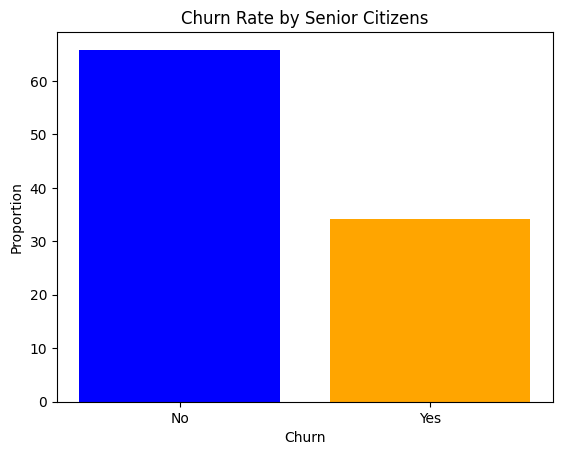

In [30]:
#plot a bar plot to visualize the above code
plt.bar(churn['Churn'], churn['proportion'], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.title('Churn Rate by Senior Citizens')


# Display the plot
plt.show()

INSIGHTS
1. Churn Rate: The data shows that while a notable fraction of customers have churned (34.17%), a considerable part of customers have not churned (65.83%).
2. Unbalanced Churn: Since a sizable fraction of the information is made up of churned consumers, it is critical to understand the causes that lead to churn.

3.Are customers with Fiber optic internet more likely churn as compared to DSL

In [73]:

# Group the data by InternetService and calculate the churn rate for each group
internet_churn_group = Cleaned_data.groupby('InternetService')['Churn'].value_counts(normalize=True)

# Extract churn rates for Fiber optic and DSL users
fiber_optic_churn_rate = internet_churn_group.loc['Fiber optic', 'Yes']
dsl_churn_rate = internet_churn_group.loc['DSL', 'Yes']
internet_churn_group 


InternetService  Churn
DSL              No       0.819825
                 Yes      0.180175
Fiber optic      No       0.576769
                 Yes      0.423231
No               No       0.929630
                 Yes      0.070370
Name: proportion, dtype: float64

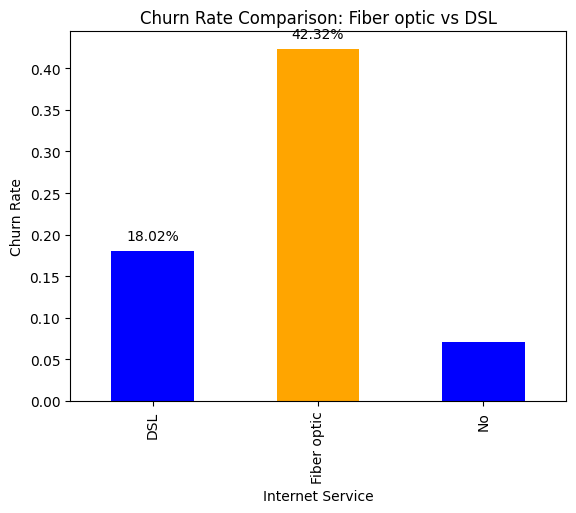

In [32]:
# Create a bar chart to visualize the churn rates
fig, ax = plt.subplots()
internet_churn_group.loc[:, 'Yes'].plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Internet Service')
ax.set_title('Churn Rate Comparison: Fiber optic vs DSL')

# Annotate the bars with the churn rates
for i, value in enumerate([dsl_churn_rate,fiber_optic_churn_rate]):
    ax.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom')

plt.show()


Churn Rates: Fiber Optic customers have a higher churn rate 42.32% compared to DSL customers 18.02%.

Q4. Which gender churned more?

In [74]:
gender_churn = Cleaned_data.groupby('Gender')['Churn'].value_counts().unstack()
gender_churn

Churn,No,Yes
Gender,,
Female,1823,661
Male,1883,675


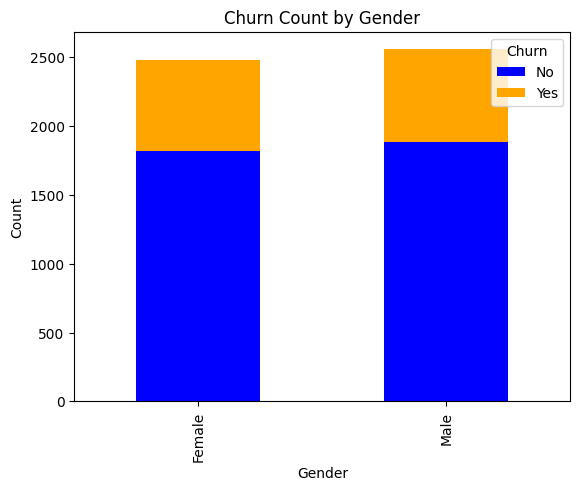

In [33]:
gender_churn = Cleaned_data.groupby('Gender')['Churn'].value_counts().unstack()

# Plot a bar chart
gender_churn.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

Q5 How does the contract duration affect the likelyhood of a customer churning?

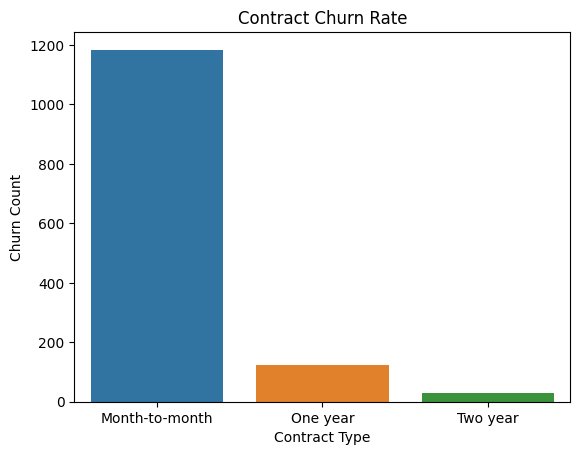

In [34]:
# Calculate churn rate by contract duration
contract_churn_rate = Cleaned_data.groupby('Contract')['Churn'].value_counts().unstack()

# Print the churn rate
#print("Churn Rate by Contract Duration:")
#print(contract_churn_rate)

sns.barplot(x=contract_churn_rate.index, y='Yes', data=contract_churn_rate.reset_index(), hue='Contract')
plt.title('Contract Churn Rate')
plt.xlabel('Contract Type')
plt.ylabel('Churn Count')
plt.show()

DATA PREPARATION
import from 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer


#Machine learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC 




SPLIT DATA INTO INPUT(X) AND TARGET(Y)

In [54]:
#split data into input(x) and target(y)
x = Cleaned_data.drop('Churn', axis=1)

In [55]:
y = Cleaned_data['Churn']



FILL NULL VALUES

SPLIT DATA INTO TRAINING AND EVALUATION

In [56]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size= 0.2, random_state=47, stratify=y)


FEATURE ENGINEERING

In [57]:
# Define preprocessing steps for numerical and categorical features
numerical_features = x.select_dtypes(include='number').columns
categorical_features = x.select_dtypes(include='object').columns
categorical_features

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object')

In [58]:

# Create a pipeline for both numerical and categorical data

numerical_data= Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    
])


categorical_data= Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore')),
    
    
])

Preprocessor= ColumnTransformer([
    ('numerical',numerical_data,numerical_features ),
    ('categorical',categorical_data,categorical_features)

])



LABEL ENCODING

In [59]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)


In [83]:
y_train.value_counts()

Churn
No     2964
Yes    1069
Name: count, dtype: int64

MACHINE LEARNING MODELLING

In [60]:

# decision tree pipeline
decision_tree= Pipeline([
    ('preprocessor',Preprocessor ),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Random Forest Pipeline
random_forest = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# KNN model
knn_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Gradient Descent model (Gradient Boosting)
gradient_descent_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', GradientBoostingClassifier())
])




TRAIN ALL MODELS 

In [61]:

decision_tree.fit(x_train,y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [62]:
random_forest.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [63]:
knn_model.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [64]:
gradient_descent_model.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

PREDICT AND CREATE A CLASSIFICATION REPORT FOR ALL MODELS

In [81]:

decision_tree_pred = decision_tree.predict(x_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test_encoded, decision_tree_pred))


decision_tree_conf_matrix = confusion_matrix(y_test_encoded, decision_tree_pred)
print("Decision Tree Confusion Matrix:")
print(decision_tree_conf_matrix)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       742
           1       0.59      0.53      0.56       267

    accuracy                           0.78      1009
   macro avg       0.71      0.70      0.70      1009
weighted avg       0.77      0.78      0.77      1009

Decision Tree Confusion Matrix:
[[642 100]
 [126 141]]


In [77]:
random_forest_pred = random_forest.predict(x_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_encoded, random_forest_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       742
           1       0.65      0.47      0.54       267

    accuracy                           0.79      1009
   macro avg       0.74      0.69      0.70      1009
weighted avg       0.78      0.79      0.78      1009



In [78]:
knn_pred = knn_model.predict(x_test)
print("\nKNN Classification Report:")
print(classification_report(y_test_encoded, knn_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       742
           1       0.53      0.53      0.53       267

    accuracy                           0.75      1009
   macro avg       0.68      0.68      0.68      1009
weighted avg       0.75      0.75      0.75      1009



In [80]:
gradient_descent_pred = gradient_descent_model.predict(x_test)
print("\nGradient Descent Classification Report:")
print(classification_report(y_test_encoded, gradient_descent_pred))


Gradient Descent Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       742
           1       0.64      0.47      0.54       267

    accuracy                           0.79      1009
   macro avg       0.73      0.69      0.70      1009
weighted avg       0.78      0.79      0.78      1009



MODEL EVALUATION